In [297]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt     

# DATA PREPROCESSING

In [298]:
df = pd.read_csv("C:\\Users\\ranab\\Downloads\\healthcare-dataset-stroke-data.csv")  #Reading the csv file.

In [299]:
df.head(10)      #Displaying the first 10 tuples of the dataset.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [300]:
df.rename(columns= {'ever_married':'married'},inplace= True)    #Renaming the attribute 'ever_married' to 'married'.

In [301]:
df.shape  #the shape of our dataset is 5110 rows and 12 columns.

(5110, 12)

In [395]:
X=df.describe()   #Statistical model of our dataset.
X.style.background_gradient(cmap = "YlGn")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5104.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.162541,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.307349,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.222500,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.160000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [303]:
df.info()  #information of the data types and non-null values of each attribute is displayed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5103 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   married            5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5104 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

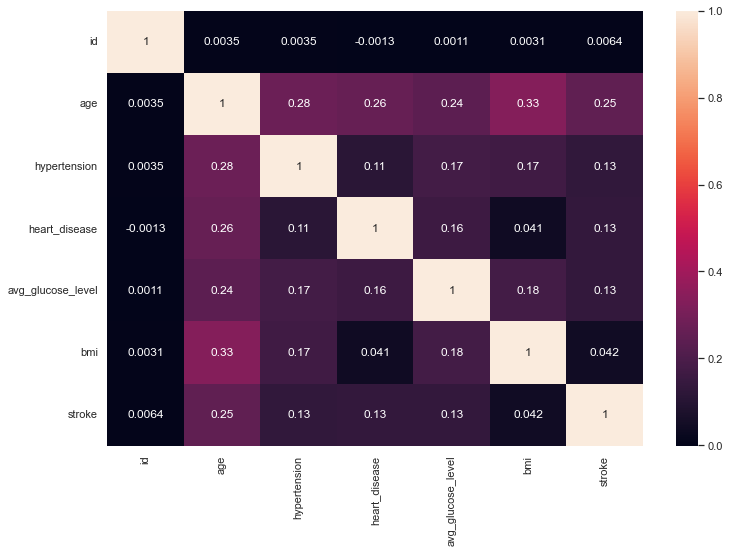

In [380]:
plt.figure()                                             #heatmap displaying correlation among all attributes.
cor = df.corr()
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(cor,annot=True)

In [304]:
df1=df.drop(columns='id',axis=1) #Dropped the least uncorrelated attribute with the target value.

In [305]:
df1.isna().sum()      #Displaying total null values in each columns

gender                 7
age                    0
hypertension           0
heart_disease          0
married                0
work_type              0
Residence_type         0
avg_glucose_level      6
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [306]:
for i in ['gender','married','work_type','Residence_type','smoking_status','stroke']:
    m=df[i].value_counts()
    print(i ,':  ')
    print(m,'\n')                #displaying various categorical attributes having distinct features and its count.

gender :  
Female    2991
Male      2111
Other        1
Name: gender, dtype: int64 

married :  
Yes    3353
No     1757
Name: married, dtype: int64 

work_type :  
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type :  
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

smoking_status :  
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

stroke :  
0    4861
1     249
Name: stroke, dtype: int64 



In [307]:
df1= df[df.gender != 'Other']   #the unwanted row which had other variable is dropped


In [308]:
df1['gender'].value_counts()

Female    2991
Male      2111
Name: gender, dtype: int64

In [309]:
df1['avg_glucose_level'].isna().sum()   #displaying total sum of null values in the avg_glucose_level attribute.

6

In [310]:
df1.isna().sum()

id                     0
gender                 7
age                    0
hypertension           0
heart_disease          0
married                0
work_type              0
Residence_type         0
avg_glucose_level      6
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [311]:
df1['avg_glucose_level']=df1['avg_glucose_level'].dropna()  # Null values were only 6 in avg_glucose_level hence they were dropped. 

C:\Users\ranab\AppData\Local\Temp/ipykernel_6100/4242138126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_glucose_level']=df1['avg_glucose_level'].dropna()


In [313]:
df1['bmi']=df1['bmi'].fillna(28.893237)   # All the null values in bmi attribute were filled with mean value.

C:\Users\ranab\AppData\Local\Temp/ipykernel_6100/2951247976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bmi']=df1['bmi'].fillna(28.893237)


In [315]:
from sklearn.impute import SimpleImputer
Imp = SimpleImputer(missing_values= np.NaN,strategy='most_frequent')
df2 = Imp.fit_transform(df1)                                         #The missing values in gender attribute were changed to the values which ere occured most frequently.

In [316]:
df3 = pd.DataFrame(df2,columns=['id','gender','age','hypertension','heart_disease','married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']) #Dataframe was formed with all the changes.

In [317]:
df3.isna().sum()     # As displayed here now our dataset is clean.

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
married              0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [381]:
L = LabelEncoder()               # Here label Encoding is performed to change the categorical attributes into numerical values.

In [382]:
df3['smoking_status'] = L.fit_transform(df3['smoking_status'])

In [383]:
df3['gender'] = L.fit_transform(df3['gender'])

In [384]:
df3['Residence_type'] = L.fit_transform(df3['Residence_type'])

In [385]:
df3['married'] = L.fit_transform(df3['married'])

In [386]:
df3['work_type'] = L.fit_transform(df3['work_type'])

In [387]:
for i in ['gender','married','work_type','Residence_type','smoking_status','stroke']:
    m=df3[i].value_counts()
    print(i ,':  ')
    print(m,'\n')                #Label formed for each distinct feature is displayed here.

gender :  
0    2998
1    2111
Name: gender, dtype: int64 

married :  
1    3353
0    1756
Name: married, dtype: int64 

work_type :  
2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64 

Residence_type :  
1    2596
0    2513
Name: Residence_type, dtype: int64 

smoking_status :  
2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64 

stroke :  
0    4860
1     249
Name: stroke, dtype: int64 



In [325]:
df3.head(10)    # After changing the strings to integer the dataframe is generated as displayed below. 

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [326]:
df3.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
married              0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [328]:
df3['bmi'].head(5) 

0         36.6
1    28.893237
2         32.5
3         34.4
4         24.0
Name: bmi, dtype: object

In [361]:
df3['bmi']=df3['bmi'].apply(np.ceil)       #Standardization of the bmi attribute which had non-standard values.

In [362]:
df3.to_csv("C:\\Users\\ranab\\Downloads\\stroke-data_preprocessed.csv")    #Saved the preprocessed data to our device.

In [ ]:
from sklearn.preprocessing import OneHotEncoder            #One hot encoding is performed on the attribute name married.

In [ ]:
H = OneHotEncoder()

In [ ]:
data =pd.DataFrame(H.fit_transform(df3[['married']]).toarray())

In [392]:
df3.join(data)

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,0,1
0,9046,1,67.0,0,1,1,2,1,228.69,37,1,1,0.0,1.0
1,51676,0,61.0,0,0,1,3,0,202.21,29,2,1,0.0,1.0
2,31112,1,80.0,0,1,1,2,0,105.92,33,2,1,0.0,1.0
3,60182,0,49.0,0,0,1,2,1,171.23,35,3,1,0.0,1.0
4,1665,0,79.0,1,0,1,3,0,174.12,24,2,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,0,80.0,1,0,1,2,1,83.75,29,2,0,0.0,1.0
5105,44873,0,81.0,0,0,1,3,1,125.2,40,2,0,0.0,1.0
5106,19723,0,35.0,0,0,1,3,0,82.99,31,2,0,0.0,1.0
5107,37544,1,51.0,0,0,1,2,0,166.29,26,1,0,0.0,1.0


# EDA

In [388]:
numerical_features = [i for i in df.columns if df[i].dtype != 'object' and i != 'id']   #Displaying all the numerical features of our dataset.
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [389]:
categorical_features = [i for i in df.columns if i not in numerical_features and i != 'stroke' and i != 'id']  #Displaying all the categorical features of our dataset.
categorical_features

['gender', 'married', 'work_type', 'Residence_type', 'smoking_status']

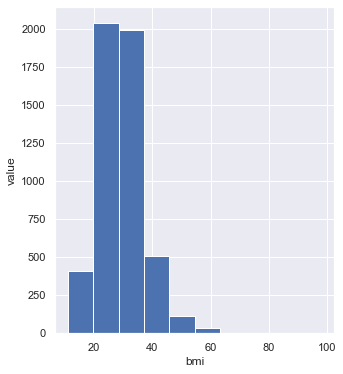

In [335]:
df3['bmi'].hist(figsize = (5, 6))  #Histogram is created to observe the pattern and distribution of bmi values in our dataset.
plt.xlabel('bmi')
plt.ylabel('value')
plt.show()

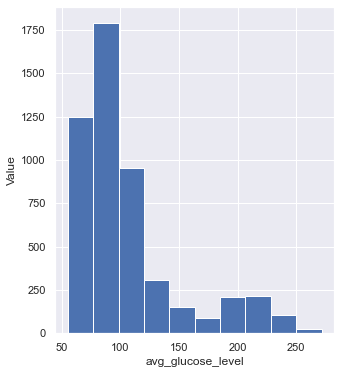

In [336]:
df3['avg_glucose_level'].hist(figsize = (5, 6))  #Histogram is created to observe the pattern and distribution of Average glucose level values in our dataset.
plt.xlabel('avg_glucose_level')
plt.ylabel('Value')
plt.show()

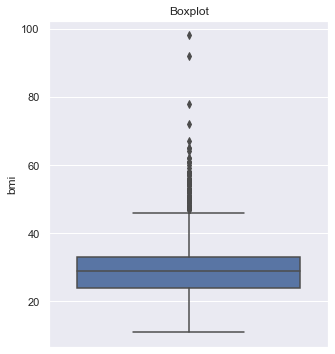

In [379]:
plt.figure(figsize=(5,6))  #to check if bmi has any outliers we ploted boxplot.
sns.boxplot(y=df3['bmi'])
plt.title('Boxplot')
plt.show()

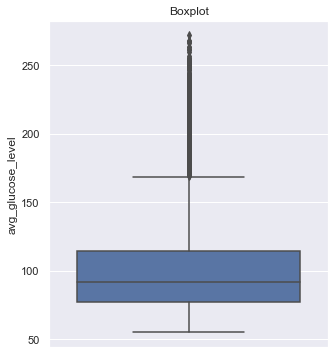

In [390]:
plt.figure(figsize=(5,6))               #to check if average glucose level has any outliers we ploted boxplot.
sns.boxplot(y=df3['avg_glucose_level'])
plt.title('Boxplot')
plt.show()

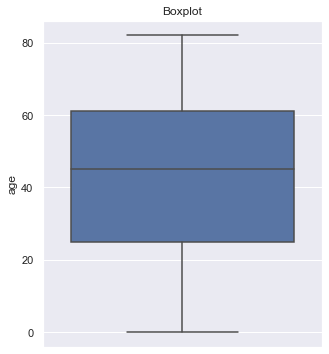

In [377]:
plt.figure(figsize=(5,6))          #to check if age has any outliers we ploted boxplot.
sns.boxplot(y=df['age'])
plt.title('Boxplot')
plt.show()

([<matplotlib.patches.Wedge at 0x1ea229a0580>,
 [Text(-1.0488255832781848, 0.3316095533321921, '0'),
  Text(1.0488255755163025, -0.3316095778817264, '1')],
 [Text(-0.5720866817881006, 0.18087793818119566, '90.3%'),
  Text(0.5720866775543468, -0.18087795157185074, '9.7%')])

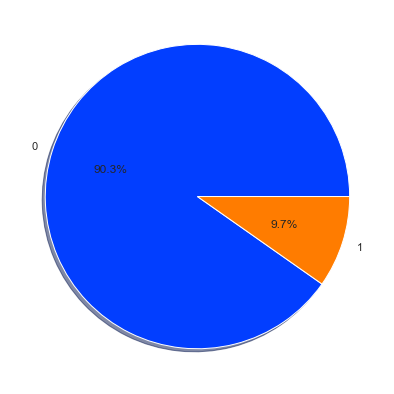

In [342]:
C = df3['hypertension'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=C,labels=['0','1'],shadow=True,autopct='%1.1f%%',colors=colors)

In [343]:
print(C)

0    4611
1     498
Name: hypertension, dtype: int64


<AxesSubplot:>

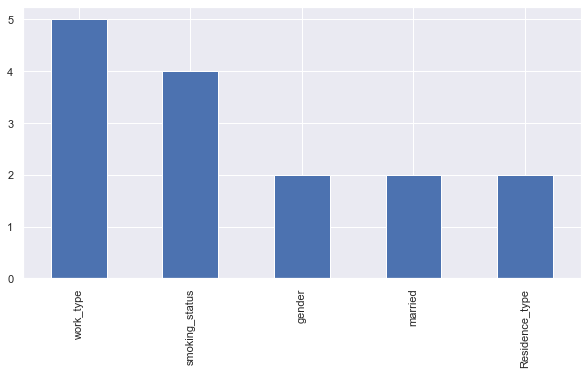

In [344]:
df3[categorical_features].nunique().sort_values(ascending = False).plot.bar(figsize = (10, 5))  #All the categorical features and the labels assigned to each is displayed here.

In [349]:
pip install missingno

<AxesSubplot:>

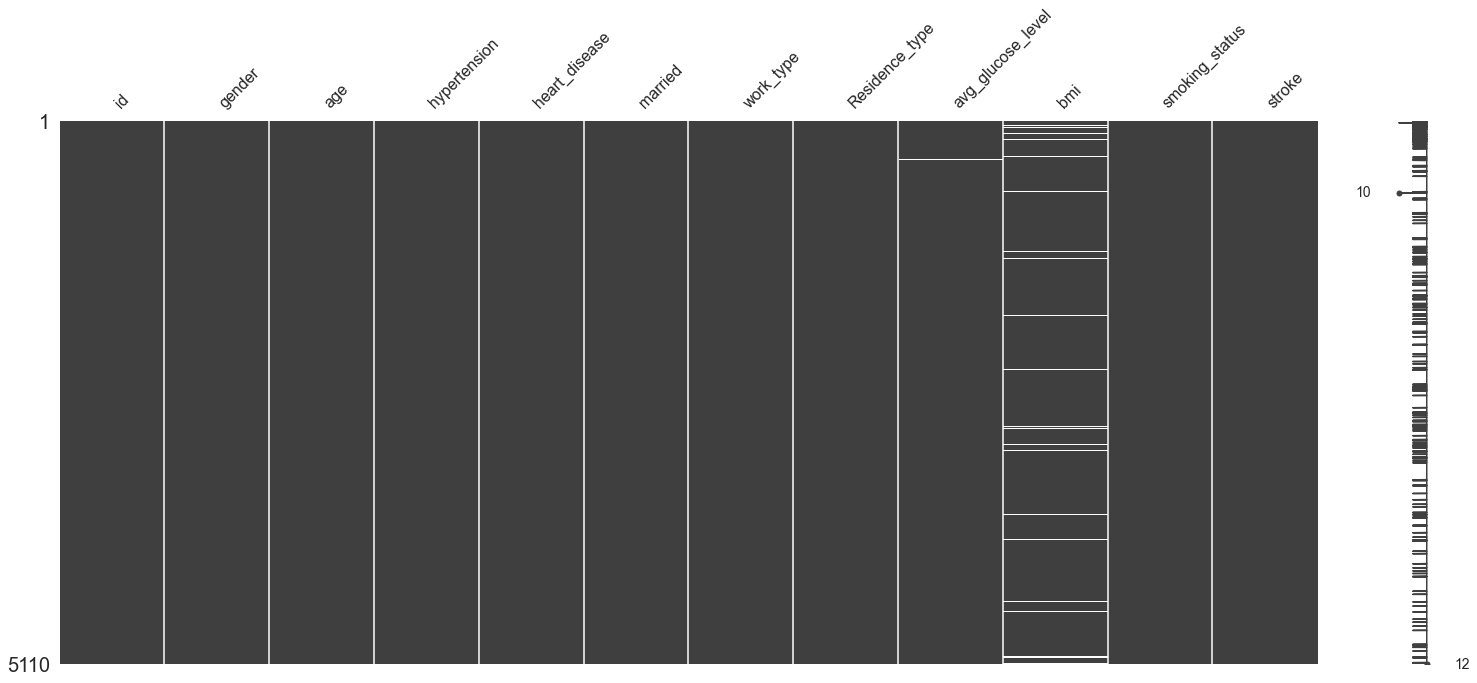

In [416]:
import missingno                   #the white line in the matrix drawn below is the null values.
missingno.matrix(df)

[Text(0.5, 1.0, 'Reason of stroke depending on age and heart_disease in people')]

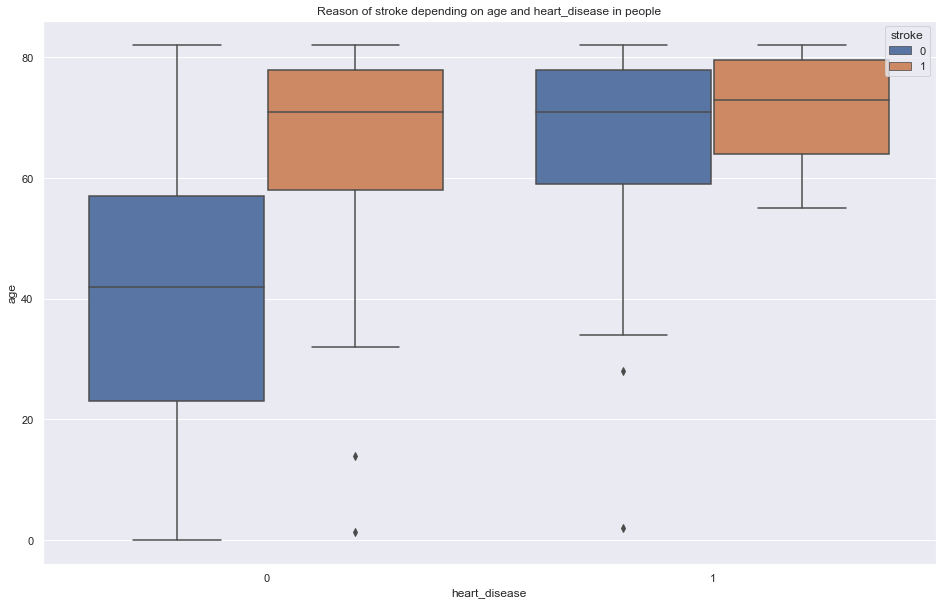

In [431]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.boxplot(data= df3,x="heart_disease", y="age", hue="stroke").set(title = 'Reason of stroke depending on age and heart_disease in people')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

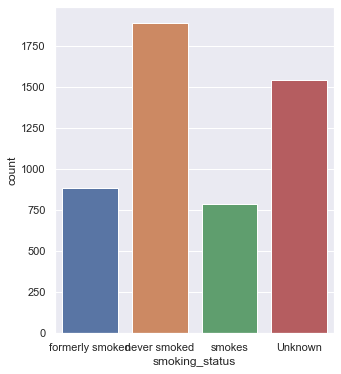

In [396]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = "smoking_status")            #Here the count of smoking status distinct variables is displayed using countplot.

In [413]:
X = df3.drop(columns=['id','gender','hypertension','smoking_status','married','work_type','Residence_type','heart_disease'],axis=1)

<Figure size 720x432 with 0 Axes>

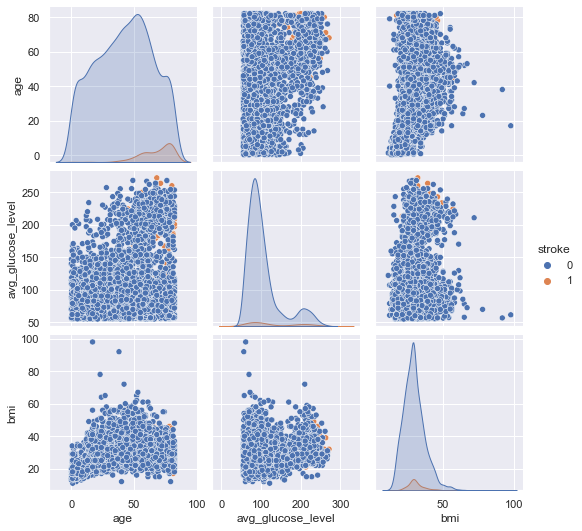

In [414]:
plt.figure(figsize=(10,6))
sns.pairplot(data= X,hue='stroke')
plt.show()                             #pair plot is formed among the attributes extracted in X dataframe w.r.t stroke.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='work_type'>

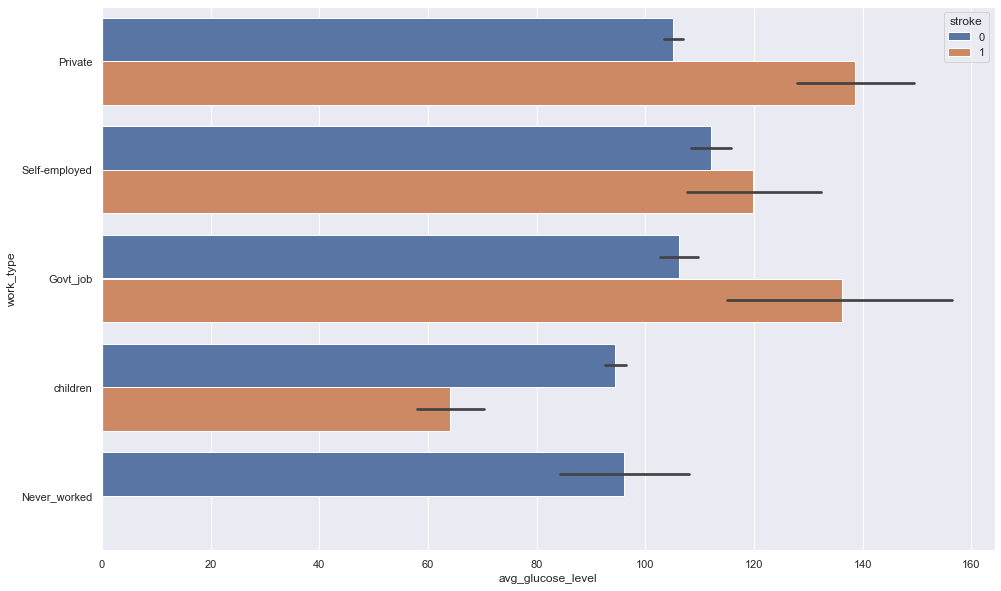

In [435]:
sns.barplot(data= df,x="avg_glucose_level", y="work_type", hue="stroke") #barplot is displayed on the work_type vs avg_glucose_level

<AxesSubplot:xlabel='bmi', ylabel='Residence_type'>

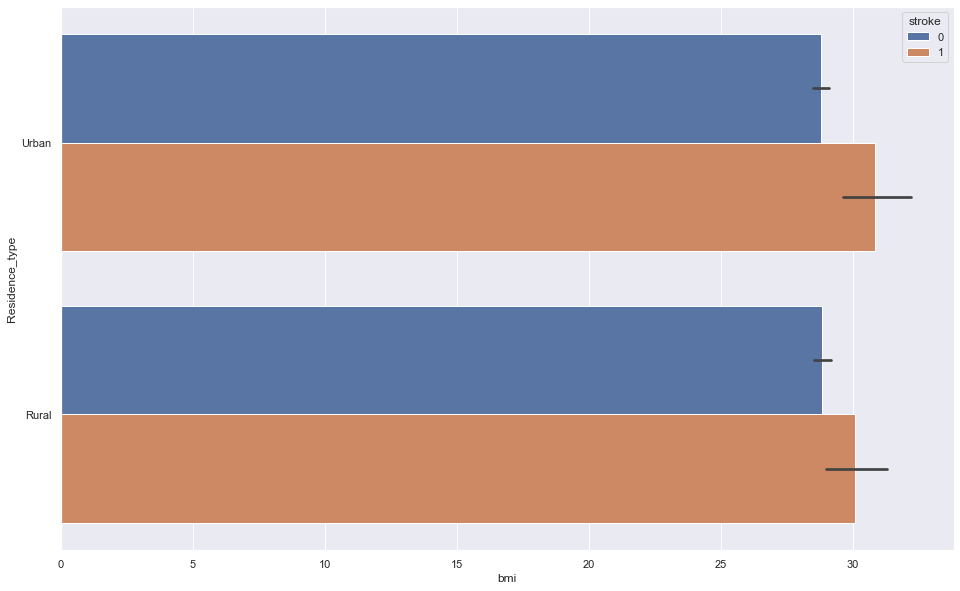

In [436]:
sns.barplot(data= df,x="bmi", y="Residence_type", hue="stroke") 